In [1]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from khmernltk import word_tokenize
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [5]:
# output_path = '/content/drive/MyDrive/CADT/Machine Learning/datasets/khmer-tts'
# output_path = '/content/drive/MyDrive/khmer-tts'

output_path = '../dataset'
print(output_path)

../dataset


In [3]:
df = pd.read_csv(f"{output_path}/line_index.tsv", sep='\t', names=["filename", "original_text"], index_col=1)
df.head()

,filename,original_text
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ


### Text Extraction

In [4]:
def normalize_text(text):
    # Remove unwanted punctuation
    text = re.sub(r'[!?]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Trim leading/trailing spaces
    text = text.strip()
    return text

# Example usage
text = "  អា  ហារ!  "
normalized_text = normalize_text(text)
print(normalized_text)

អា ហារ


In [5]:
df["tokenized_text"] = df["original_text"].apply(word_tokenize)
df.head()

| 2025-01-07 21:09:00,822 | INFO | khmer-nltk | Loaded model from f:\Anaconda\envs\khmer-tts\Lib\site-packages\khmernltk\word_tokenize\sklearn_crf_ner_10000.sav |


,filename,original_text,tokenized_text
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...,"[ស្ពាន, , កំពង់, , ចម្លង, , អ្នកលឿង, , នៅ,..."
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...,"[ភ្លើង, , កំពុង, , ឆាប, , ឆេះ, , ផ្ទះ, , ..."
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...,"[អ្នក, , សុំ, , ទាន, , ដេក, , ប្រកាច់, , ..."
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...,"[ស្ករ, , ត្នោត, , ដែល, , មាន, , គុណភាព, ,..."
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ,"[ភ្នំ, បាខែង, , មាន, , កម្ពស់, , តែ, , ចិត..."


In [6]:
# Filter empty tokens
df["tokenized_text"] = df["tokenized_text"].apply(
    lambda tokens: [token for token in tokens if token.strip() != '']
)
df.head()

,filename,original_text,tokenized_text
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...,"[ស្ពាន, កំពង់, ចម្លង, អ្នកលឿង, នៅ, ព្រៃវែង, ជា..."
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...,"[ភ្លើង, កំពុង, ឆាប, ឆេះ, ផ្ទះ, ប្រជា, ពលរដ្ឋ, ..."
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...,"[អ្នក, សុំ, ទាន, ដេក, ប្រកាច់, ម្នាក់, ឯង, ក្ប..."
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...,"[ស្ករ, ត្នោត, ដែល, មាន, គុណភាព, ល្អ, ផលិត, នៅ,..."
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ,"[ភ្នំ, បាខែង, មាន, កម្ពស់, តែ, ចិត, សិប, ម៉ែត្..."


In [7]:
def grapheme_tokenize(text):
    return list(text)

df["grapheme_tokenized"] = df["original_text"].apply(grapheme_tokenize)
df.head()

,filename,original_text,tokenized_text,grapheme_tokenized
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...,"[ស្ពាន, កំពង់, ចម្លង, អ្នកលឿង, នៅ, ព្រៃវែង, ជា...","[ស, ្, ព, ា, ន, , ក, ំ, ព, ង, ់, , ច, ម, ្, ..."
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...,"[ភ្លើង, កំពុង, ឆាប, ឆេះ, ផ្ទះ, ប្រជា, ពលរដ្ឋ, ...","[ភ, ្, ល, ើ, ង, , ក, ំ, ព, ុ, ង, , ឆ, ា, ប, ..."
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...,"[អ្នក, សុំ, ទាន, ដេក, ប្រកាច់, ម្នាក់, ឯង, ក្ប...","[អ, ្, ន, ក, , ស, ុ, ំ, , ទ, ា, ន, , ដ, េ, ..."
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...,"[ស្ករ, ត្នោត, ដែល, មាន, គុណភាព, ល្អ, ផលិត, នៅ,...","[ស, ្, ក, រ, , ត, ្, ន, ោ, ត, , ដ, ែ, ល, , ..."
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ,"[ភ្នំ, បាខែង, មាន, កម្ពស់, តែ, ចិត, សិប, ម៉ែត្...","[ភ, ្, ន, ំ, ប, ា, ខ, ែ, ង, , ម, ា, ន, , ក, ..."


In [8]:
# Build vocabulary for graphemes
all_graphemes = set("".join(df["grapheme_tokenized"].sum()))
vocab = {grapheme: idx for idx, grapheme in enumerate(sorted(all_graphemes))}
print(vocab)

with open(f"{output_path}/tacotron2_grapheme_vocab.txt", "w+") as f:
  f.write(str(vocab))

{' ': 0, 'ក': 1, 'ខ': 2, 'គ': 3, 'ឃ': 4, 'ង': 5, 'ច': 6, 'ឆ': 7, 'ជ': 8, 'ឈ': 9, 'ញ': 10, 'ដ': 11, 'ឋ': 12, 'ឌ': 13, 'ឍ': 14, 'ណ': 15, 'ត': 16, 'ថ': 17, 'ទ': 18, 'ធ': 19, 'ន': 20, 'ប': 21, 'ផ': 22, 'ព': 23, 'ភ': 24, 'ម': 25, 'យ': 26, 'រ': 27, 'ល': 28, 'វ': 29, 'ស': 30, 'ហ': 31, 'ឡ': 32, 'អ': 33, 'ឥ': 34, 'ឧ': 35, 'ឪ': 36, 'ឫ': 37, 'ឬ': 38, 'ឭ': 39, 'ឮ': 40, 'ឯ': 41, 'ឱ': 42, 'ា': 43, 'ិ': 44, 'ី': 45, 'ឹ': 46, 'ឺ': 47, 'ុ': 48, 'ូ': 49, 'ួ': 50, 'ើ': 51, 'ឿ': 52, 'ៀ': 53, 'េ': 54, 'ែ': 55, 'ៃ': 56, 'ោ': 57, 'ៅ': 58, 'ំ': 59, 'ះ': 60, 'ៈ': 61, '៉': 62, '៊': 63, '់': 64, '៌': 65, '៍': 66, '៎': 67, '៏': 68, '័': 69, '្': 70}


In [9]:
# Encode grapheme-tokenized text
df["encoded_grapheme_text"] = df["grapheme_tokenized"].apply(
    lambda graphemes: [vocab[grapheme] for grapheme in graphemes]
)
df.head()

,filename,original_text,tokenized_text,grapheme_tokenized,encoded_grapheme_text
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...,"[ស្ពាន, កំពង់, ចម្លង, អ្នកលឿង, នៅ, ព្រៃវែង, ជា...","[ស, ្, ព, ា, ន, , ក, ំ, ព, ង, ់, , ច, ម, ្, ...","[30, 70, 23, 43, 20, 0, 1, 59, 23, 5, 64, 0, 6..."
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...,"[ភ្លើង, កំពុង, ឆាប, ឆេះ, ផ្ទះ, ប្រជា, ពលរដ្ឋ, ...","[ភ, ្, ល, ើ, ង, , ក, ំ, ព, ុ, ង, , ឆ, ា, ប, ...","[24, 70, 28, 51, 5, 0, 1, 59, 23, 48, 5, 0, 7,..."
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...,"[អ្នក, សុំ, ទាន, ដេក, ប្រកាច់, ម្នាក់, ឯង, ក្ប...","[អ, ្, ន, ក, , ស, ុ, ំ, , ទ, ា, ន, , ដ, េ, ...","[33, 70, 20, 1, 0, 30, 48, 59, 0, 18, 43, 20, ..."
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...,"[ស្ករ, ត្នោត, ដែល, មាន, គុណភាព, ល្អ, ផលិត, នៅ,...","[ស, ្, ក, រ, , ត, ្, ន, ោ, ត, , ដ, ែ, ល, , ...","[30, 70, 1, 27, 0, 16, 70, 20, 57, 16, 0, 11, ..."
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ,"[ភ្នំ, បាខែង, មាន, កម្ពស់, តែ, ចិត, សិប, ម៉ែត្...","[ភ, ្, ន, ំ, ប, ា, ខ, ែ, ង, , ម, ា, ន, , ក, ...","[24, 70, 20, 59, 21, 43, 2, 55, 5, 0, 25, 43, ..."


### Audio Extraction

In [10]:
def process_audio_files(input_dir, output_dir):
    for index, row in df.iterrows():
        audio_path = os.path.join(input_dir, f"{row['filename']}.wav")
        output_path = os.path.join(output_dir, f"{row['filename']}_mel.npy")

        # Load and process audio
        waveform, sample_rate = librosa.load(audio_path, sr=22050)
        waveform = waveform / max(abs(waveform))  # Normalize
        waveform, _ = librosa.effects.trim(waveform)  # Trim silence

        # Compute Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(
            y=waveform, sr=sample_rate, n_fft=1024, hop_length=256, n_mels=80
        )
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # Save as .npy
        np.save(output_path, mel_spectrogram_db)

    print("Audio processing completed!")

# Example usage
# process_audio_files(f"{output_path}/wavs/", f"{output_path}/processed_wavs/")

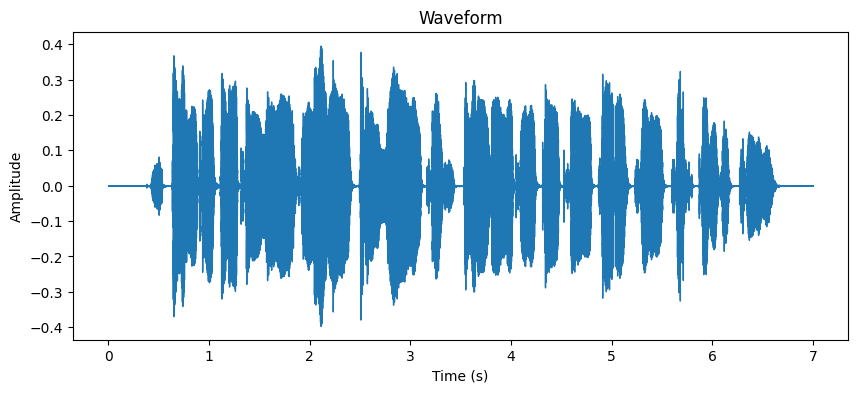

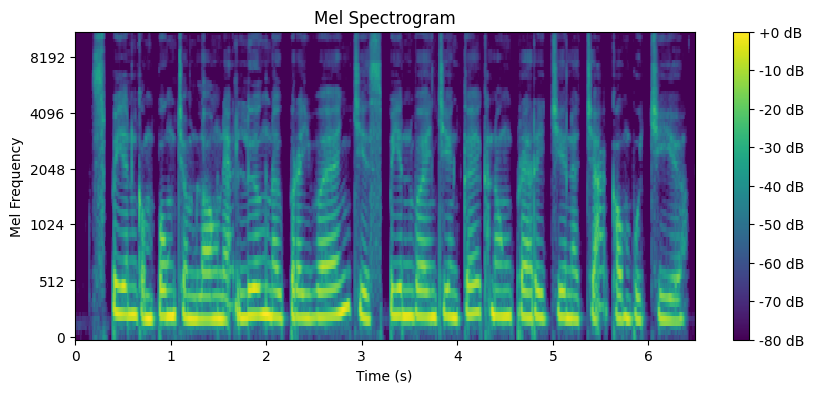

In [11]:
# Validate mel spectrogram
# Load the original waveform
audio_path = f"{output_path}/wavs/khm_0308_0011865648.wav"
waveform, sr = librosa.load(audio_path, sr=22050)

# Load the Mel spectrogram
mel_path = f"{output_path}/processed_wavs/khm_0308_0011865648_mel.npy"
mel_spectrogram = np.load(mel_path)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.title("Waveform")
librosa.display.waveshow(waveform, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
plt.title("Mel Spectrogram")
librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=256, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format="%+2.0f dB")
plt.xlabel("Time (s)")
plt.ylabel("Mel Frequency")
plt.show()

In [12]:
# Include the mel spectrogram path
df["mel_path"] = df["filename"].apply(lambda x: f"processed_wavs/{x.split('.')[0]}_mel.npy")
df.head()

,filename,original_text,tokenized_text,grapheme_tokenized,encoded_grapheme_text,mel_path
NaN,khm_0308_0011865648,ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...,"[ស្ពាន, កំពង់, ចម្លង, អ្នកលឿង, នៅ, ព្រៃវែង, ជា...","[ស, ្, ព, ា, ន, , ក, ំ, ព, ង, ់, , ច, ម, ្, ...","[30, 70, 23, 43, 20, 0, 1, 59, 23, 5, 64, 0, 6...",processed_wavs/khm_0308_0011865648_mel.npy
NaN,khm_0308_0032157149,ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...,"[ភ្លើង, កំពុង, ឆាប, ឆេះ, ផ្ទះ, ប្រជា, ពលរដ្ឋ, ...","[ភ, ្, ល, ើ, ង, , ក, ំ, ព, ុ, ង, , ឆ, ា, ប, ...","[24, 70, 28, 51, 5, 0, 1, 59, 23, 48, 5, 0, 7,...",processed_wavs/khm_0308_0032157149_mel.npy
NaN,khm_0308_0038959268,អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...,"[អ្នក, សុំ, ទាន, ដេក, ប្រកាច់, ម្នាក់, ឯង, ក្ប...","[អ, ្, ន, ក, , ស, ុ, ំ, , ទ, ា, ន, , ដ, េ, ...","[33, 70, 20, 1, 0, 30, 48, 59, 0, 18, 43, 20, ...",processed_wavs/khm_0308_0038959268_mel.npy
NaN,khm_0308_0054635313,ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...,"[ស្ករ, ត្នោត, ដែល, មាន, គុណភាព, ល្អ, ផលិត, នៅ,...","[ស, ្, ក, រ, , ត, ្, ន, ោ, ត, , ដ, ែ, ល, , ...","[30, 70, 1, 27, 0, 16, 70, 20, 57, 16, 0, 11, ...",processed_wavs/khm_0308_0054635313_mel.npy
NaN,khm_0308_0055735195,ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ,"[ភ្នំ, បាខែង, មាន, កម្ពស់, តែ, ចិត, សិប, ម៉ែត្...","[ភ, ្, ន, ំ, ប, ា, ខ, ែ, ង, , ម, ា, ន, , ក, ...","[24, 70, 20, 59, 21, 43, 2, 55, 5, 0, 25, 43, ...",processed_wavs/khm_0308_0055735195_mel.npy


In [13]:
# tokenized_texts = df['tokenized_text']

# vocab = {token: idx for idx, token in enumerate(set(sum(tokenized_texts, [])))}
# print(vocab)

# encoded_texts = [[vocab[token] for token in tokens] for tokens in tokenized_texts]
# # print(encoded_texts)

# df['encoded_text'] = encoded_texts
# df.head()

In [14]:
# Save the updated tsv
df.to_csv(f"{output_path}/updated_metadata.tsv", sep="\t", header=True, index=False)

### Training

In [15]:
from torch.utils.data import Dataset
import torch
import torch.nn.functional as F  # Add this import

class TTS_Dataset(Dataset):
    def __init__(self, metadata):
        self.metadata = metadata

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        # Load encoded text and mel spectrogram
        text = self.metadata.iloc[idx]["encoded_grapheme_text"]
        mel_path = self.metadata.iloc[idx]["mel_path"]
        mel = np.load(f"{output_path}/{mel_path}")

        # Convert to tensors
        text = torch.tensor(text, dtype=torch.long)
        mel = torch.tensor(mel, dtype=torch.float)

        return text, mel

In [16]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    # Sort by text length (descending)
    batch.sort(key=lambda x: len(x[0]), reverse=True)

    # Separate text and mel
    text_padded = []
    mel_padded = []
    text_lengths = []
    mel_lengths = []
    gates_padded = []

    max_text_len = max(len(x[0]) for x in batch)
    max_mel_len = max(x[1].size(1) for x in batch)  # Assuming mel shape is (80, time)

    for text, mel in batch:
        # Get lengths
        text_len = len(text)
        mel_len = mel.size(1)

        # Pad text
        text_pad = F.pad(text, (0, max_text_len - text_len), value=0)
        text_padded.append(text_pad)
        text_lengths.append(text_len)

        # Pad mel
        mel_pad = F.pad(mel, (0, max_mel_len - mel_len), value=0)
        mel_padded.append(mel_pad)
        mel_lengths.append(mel_len)

        # Create gate target (1s followed by a 0 at the end)
        gate = torch.ones(max_mel_len)
        gate[mel_len-1:] = 0  # Set padding positions to 0
        gates_padded.append(gate)

    # Stack everything
    text_padded = torch.stack(text_padded)
    mel_padded = torch.stack(mel_padded)
    text_lengths = torch.LongTensor(text_lengths)
    mel_lengths = torch.LongTensor(mel_lengths)
    gates_padded = torch.stack(gates_padded)

    return text_padded, text_lengths, mel_padded, mel_lengths, gates_padded

In [17]:
from torch.utils.data import DataLoader

dataset = TTS_Dataset(df)
# Reduced the batch_size if using CPU if not keep it at 30 or 32
dataloader = DataLoader(dataset, batch_size=24, shuffle=True, collate_fn=collate_fn, num_workers=0)

Using cache found in C:\Users\ADMIN/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


mel_pred shape: (80, 819)
Gradient norm: 92.81080171919817
Epoch 1/20, Batch 0, Loss: 3353.8914, Mel Loss: 3353.1636, Gate Loss: 0.7277, LR: 0.000500
Gradient norm: 474.7898560266495
Epoch 1/20, Batch 10, Loss: 3518.8320, Mel Loss: 3518.5991, Gate Loss: 0.2330, LR: 0.000500
Gradient norm: 341.171031296839
Epoch 1/20, Batch 20, Loss: 1969.9479, Mel Loss: 1969.8923, Gate Loss: 0.0556, LR: 0.000500
Gradient norm: 354.6718493964158
Epoch 1/20, Batch 30, Loss: 1758.3698, Mel Loss: 1758.3381, Gate Loss: 0.0316, LR: 0.000500
Gradient norm: 267.22390594073215
Epoch 1/20, Batch 40, Loss: 1165.0347, Mel Loss: 1165.0087, Gate Loss: 0.0260, LR: 0.000500
mel_pred shape: (80, 774)
Gradient norm: 138.37858396206022
Epoch 1/20, Batch 50, Loss: 561.3320, Mel Loss: 561.3143, Gate Loss: 0.0176, LR: 0.000500
Gradient norm: 92.18152552772204
Epoch 1/20, Batch 60, Loss: 389.0051, Mel Loss: 388.9870, Gate Loss: 0.0181, LR: 0.000500
Gradient norm: 55.72486467712452
Epoch 1/20, Batch 70, Loss: 361.4842, Mel Lo

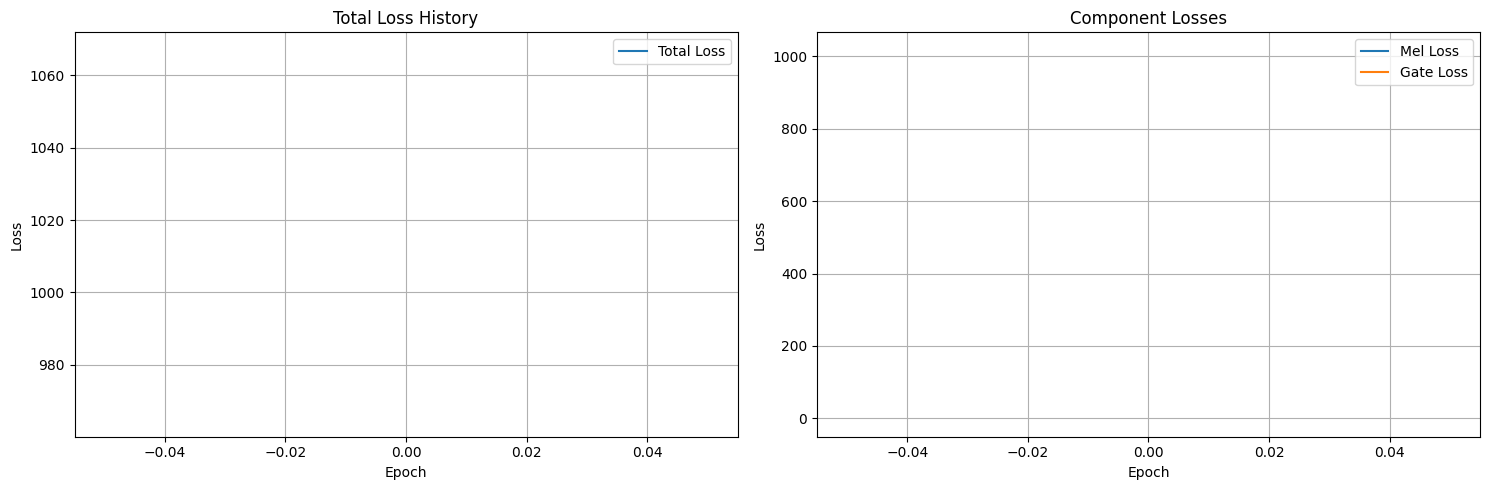

Error generating waveform: CUDA out of memory. Tried to allocate 1.85 GiB. GPU 0 has a total capacity of 12.00 GiB of which 0 bytes is free. Of the allocated memory 10.78 GiB is allocated by PyTorch, and 98.52 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Gradient norm: 242.58370432320277
Epoch 2/20, Batch 10, Loss: 253.3733, Mel Loss: 253.3498, Gate Loss: 0.0235, LR: 0.000475
Gradient norm: 56.20666688241279
Epoch 2/20, Batch 20, Loss: 178.7467, Mel Loss: 178.7283, Gate Loss: 0.0184, LR: 0.000475
Gradient norm: 88.84829979460392
Epoch 2/20, Batch 30, Loss: 201.2549, Mel Loss: 201.2363, Gate Loss: 0.0186, LR: 0.000475
Gradient norm: 143.62049344144276
Epoch 2/20, Batch 40, Loss: 202.1973, Mel Loss: 202.1759, Gate Loss: 0.0213, LR: 0.000475
mel_pred 

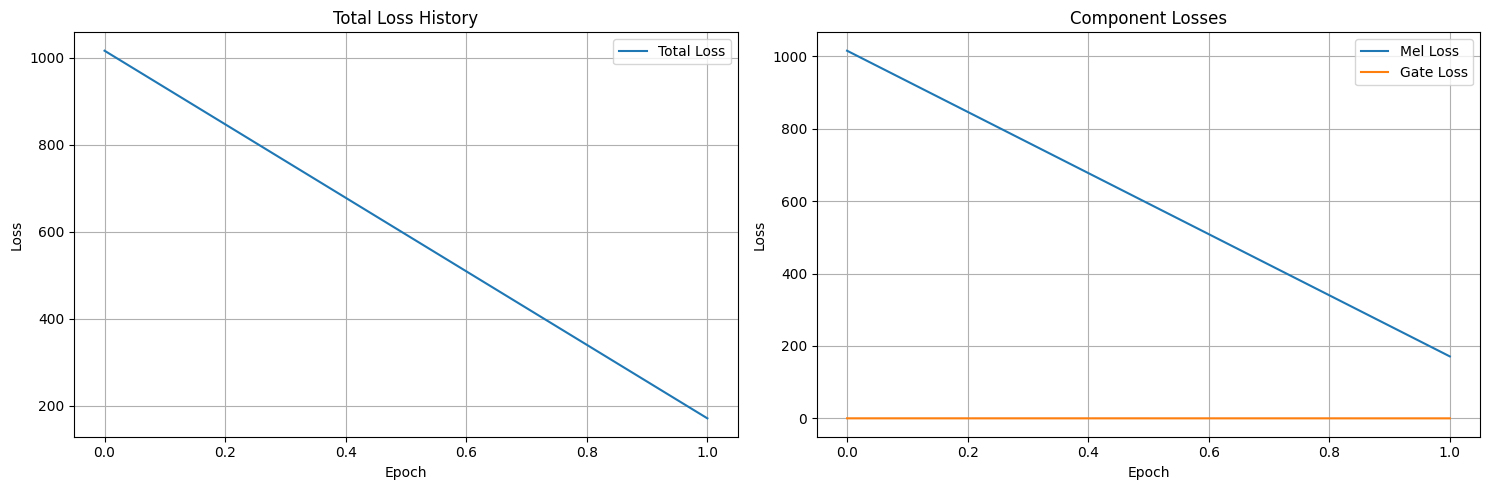

mel_pred shape: (80, 643)
Gradient norm: 80.75147246792451
Epoch 3/20, Batch 0, Loss: 127.7478, Mel Loss: 127.7326, Gate Loss: 0.0153, LR: 0.000451
Gradient norm: 63.317419232821
Epoch 3/20, Batch 10, Loss: 114.1578, Mel Loss: 114.1448, Gate Loss: 0.0130, LR: 0.000451
Gradient norm: 190.75479626683753
Epoch 3/20, Batch 20, Loss: 172.3819, Mel Loss: 172.3630, Gate Loss: 0.0189, LR: 0.000451
Gradient norm: 149.65381633121126
Epoch 3/20, Batch 30, Loss: 164.1867, Mel Loss: 164.1682, Gate Loss: 0.0185, LR: 0.000451
Gradient norm: 94.38679452129475
Epoch 3/20, Batch 40, Loss: 148.3307, Mel Loss: 148.3151, Gate Loss: 0.0157, LR: 0.000451
mel_pred shape: (80, 617)
Gradient norm: 145.5259614566722
Epoch 3/20, Batch 50, Loss: 158.1531, Mel Loss: 158.1366, Gate Loss: 0.0164, LR: 0.000451
Gradient norm: 134.4589777824494
Epoch 3/20, Batch 60, Loss: 118.0090, Mel Loss: 117.9950, Gate Loss: 0.0140, LR: 0.000451
Gradient norm: 122.10525359739765
Epoch 3/20, Batch 70, Loss: 150.7479, Mel Loss: 150.73

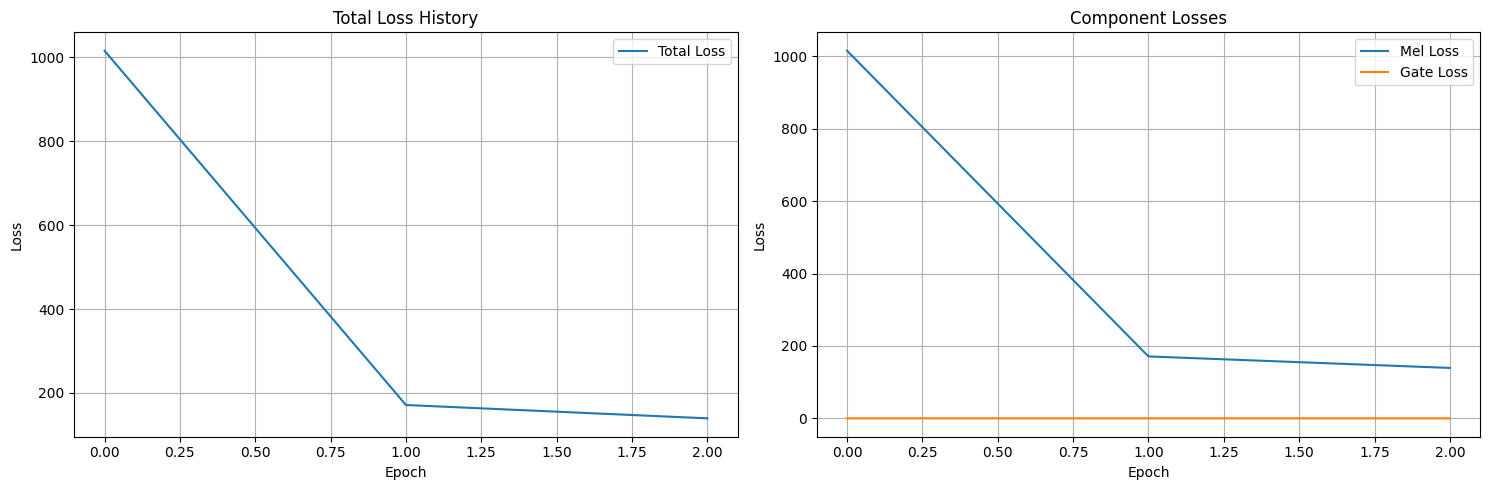

mel_pred shape: (80, 611)
Gradient norm: 187.8993151711227
Epoch 4/20, Batch 0, Loss: 124.1987, Mel Loss: 124.1824, Gate Loss: 0.0163, LR: 0.000429
Gradient norm: 135.4054430349126
Epoch 4/20, Batch 10, Loss: 133.5182, Mel Loss: 133.5001, Gate Loss: 0.0181, LR: 0.000429
Gradient norm: 67.68870596102072
Epoch 4/20, Batch 20, Loss: 143.9884, Mel Loss: 143.9724, Gate Loss: 0.0160, LR: 0.000429
Gradient norm: 235.0372719619959
Epoch 4/20, Batch 30, Loss: 132.4790, Mel Loss: 132.4623, Gate Loss: 0.0167, LR: 0.000429
Gradient norm: 56.44499483178877
Epoch 4/20, Batch 40, Loss: 80.9507, Mel Loss: 80.9408, Gate Loss: 0.0099, LR: 0.000429
mel_pred shape: (80, 649)
Gradient norm: 50.376002622410205
Epoch 4/20, Batch 50, Loss: 129.4904, Mel Loss: 129.4758, Gate Loss: 0.0146, LR: 0.000429
Gradient norm: 48.48932516504311
Epoch 4/20, Batch 60, Loss: 139.3840, Mel Loss: 139.3673, Gate Loss: 0.0167, LR: 0.000429
Gradient norm: 67.54453761004785
Epoch 4/20, Batch 70, Loss: 128.8749, Mel Loss: 128.8585

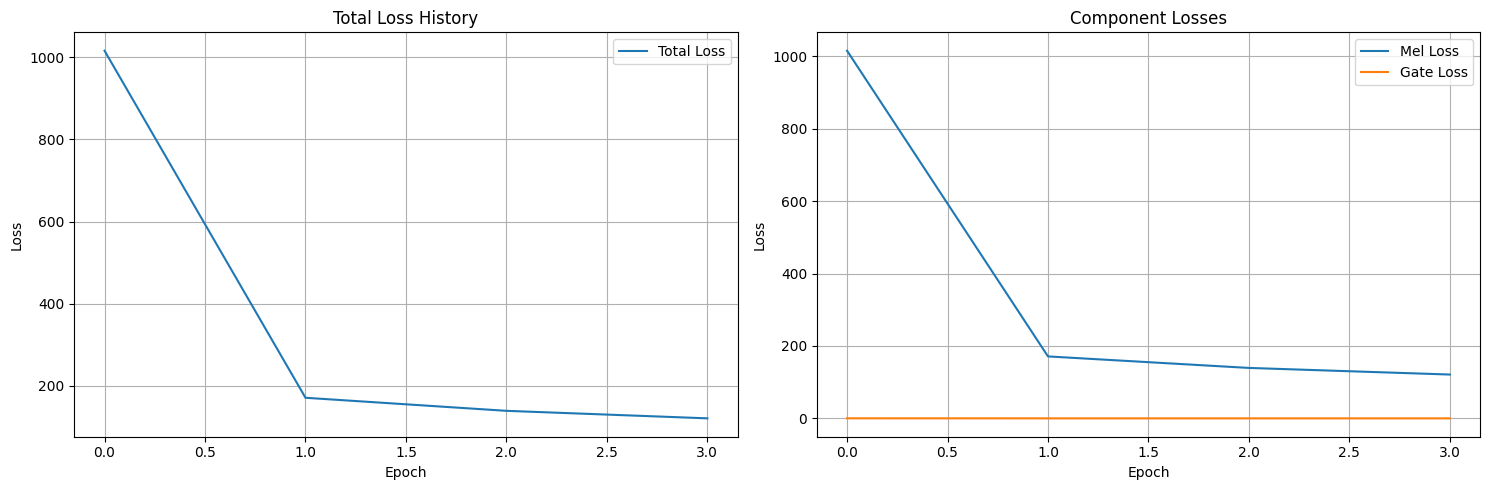

mel_pred shape: (80, 697)
Gradient norm: 70.21394154967936
Epoch 5/20, Batch 0, Loss: 107.5546, Mel Loss: 107.5404, Gate Loss: 0.0142, LR: 0.000407
Gradient norm: 66.09766078616136
Epoch 5/20, Batch 10, Loss: 121.5545, Mel Loss: 121.5401, Gate Loss: 0.0144, LR: 0.000407
Gradient norm: 55.73773287936804
Epoch 5/20, Batch 20, Loss: 105.2236, Mel Loss: 105.2087, Gate Loss: 0.0149, LR: 0.000407
Gradient norm: 97.77008987829058
Epoch 5/20, Batch 30, Loss: 101.9455, Mel Loss: 101.9311, Gate Loss: 0.0143, LR: 0.000407
Gradient norm: 90.49243389461692
Epoch 5/20, Batch 40, Loss: 122.8869, Mel Loss: 122.8714, Gate Loss: 0.0155, LR: 0.000407
mel_pred shape: (80, 679)
Gradient norm: 41.58935471536998
Epoch 5/20, Batch 50, Loss: 104.6664, Mel Loss: 104.6528, Gate Loss: 0.0136, LR: 0.000407
Gradient norm: 94.2165466047315
Epoch 5/20, Batch 60, Loss: 120.7715, Mel Loss: 120.7554, Gate Loss: 0.0161, LR: 0.000407
Gradient norm: 118.21255282787442
Epoch 5/20, Batch 70, Loss: 123.6490, Mel Loss: 123.631

: 

In [48]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
import torch
import random

# Load Tacotron 2 and vocoder
device = "cuda" if torch.cuda.is_available() else "cpu"
tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub',
                          'nvidia_tacotron2',
                          model_math='fp16',
                          pretrained=False)
tacotron2 = tacotron2.to(device)

# Initialize vocoder
vocoder = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_vocoder().to(device)

# Initialize lists to store history
loss_history = []
mel_loss_history = []
gate_loss_history = []

# Training parameters
optimizer = optim.Adam(tacotron2.parameters(),
                      lr=5e-4,  # Reduced learning rate
                      weight_decay=1e-6)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
epochs = 20
grad_clip_thresh = 1.0
teacher_forcing_ratio = 0.9

def plot_waveform_and_mel(mel_output, mel_target, waveform, epoch, batch_idx):
    """Plot waveform and mel spectrograms"""
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))

    # Plot waveform
    waveform = waveform.cpu().squeeze(0).numpy()
    time_axis = np.arange(len(waveform)) / 22050
    axes[0].plot(time_axis, waveform)
    axes[0].set_title('Generated Waveform')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')
    axes[0].grid(True)

    # Plot ground truth mel spectrogram
    im = axes[1].imshow(mel_target, aspect='auto', origin='lower', interpolation='none')
    axes[1].set_title('Ground Truth Mel Spectrogram')
    plt.colorbar(im, ax=axes[1])

    # Plot predicted mel spectrogram
    im = axes[2].imshow(mel_output, aspect='auto', origin='lower', interpolation='none')
    axes[2].set_title('Predicted Mel Spectrogram')
    plt.colorbar(im, ax=axes[2])

    plt.suptitle(f'Epoch {epoch+1}, Batch {batch_idx}')
    plt.tight_layout()
    plt.show()

def plot_training_progress(loss_history, mel_losses, gate_losses):
    """Plot the training progress"""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Total Loss')
    plt.title('Total Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(mel_losses, label='Mel Loss')
    plt.plot(gate_losses, label='Gate Loss')
    plt.title('Component Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Training loop
for epoch in range(epochs):
    tacotron2.train()
    running_loss = 0.0
    running_mel_loss = 0.0
    running_gate_loss = 0.0

    for batch_idx, (text_padded, text_lengths, mel_padded, mel_lengths, gates_padded) in enumerate(dataloader):
        # Move all tensors to device
        text_padded = text_padded.to(device)
        text_lengths = text_lengths.to(device)
        mel_padded = mel_padded.to(device)
        mel_lengths = mel_lengths.to(device)
        gates_padded = gates_padded.to(device)

        try:
            # Forward pass
            max_len = torch.max(mel_lengths).item()
            use_teacher_forcing = (random.random() < teacher_forcing_ratio)
            model_inputs = (text_padded, text_lengths, mel_padded, max_len, mel_lengths)

            outputs = tacotron2(model_inputs)
            mel_out, mel_out_postnet, gate_out = outputs[0], outputs[1], outputs[2]
            
            # Check output sizes
            if mel_out.size(2) < 2:
                print(f"Warning: Very short mel output detected (size: {mel_out.size()})")
                continue

            # Compute loss with size checks
            mel_target = mel_padded[:, :, :mel_out.size(2)]
            gate_target = gates_padded[:, :gate_out.size(1)]

            mel_loss = torch.nn.MSELoss()(mel_out, mel_target) + \
                      torch.nn.MSELoss()(mel_out_postnet, mel_target)
            gate_loss = torch.nn.BCEWithLogitsLoss()(gate_out, gate_target)
            loss = mel_loss + gate_loss

            # Visualization every 50 batches
            if batch_idx % 50 == 0:
                with torch.no_grad():
                    mel_target = mel_padded[0].cpu().detach().numpy()
                    mel_pred = mel_out_postnet[0].cpu().detach().numpy()

                    if mel_out_postnet.size(2) > 0:
                        try:
                            waveforms, lengths = vocoder(mel_out_postnet,
                                                       torch.tensor([mel_out_postnet.size(2)]))
                            # plot_waveform_and_mel(mel_pred, mel_target, waveforms,
                            #                     epoch, batch_idx)
                            print(f"mel_pred shape: {mel_pred.shape}")
                        except Exception as e:
                            print(f"Error generating waveform: {e}")
                            continue

            if torch.isnan(loss):
                print(f"NaN loss detected at epoch {epoch}, batch {batch_idx}")
                print("Current learning rate:", optimizer.param_groups[0]['lr'])
                continue

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # Gradient value checking
            total_norm = 0
            for p in tacotron2.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** (1. / 2)

            if batch_idx % 10 == 0:
                print(f"Gradient norm: {total_norm}")

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(tacotron2.parameters(), grad_clip_thresh)

            # Update weights
            optimizer.step()

            # Update running losses
            running_loss += loss.item()
            running_mel_loss += mel_loss.item()
            running_gate_loss += gate_loss.item()

            # Print progress
            if batch_idx % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Batch {batch_idx}, '
                      f'Loss: {loss.item():.4f}, '
                      f'Mel Loss: {mel_loss.item():.4f}, '
                      f'Gate Loss: {gate_loss.item():.4f}, '
                      f'LR: {optimizer.param_groups[0]["lr"]:.6f}')

        except RuntimeError as e:
            print(f"Error in batch {batch_idx}: {e}")
            print(f"Mel output size: {mel_out.size()}")
            print(f"Gate output size: {gate_out.size()}")
            print(f"Target mel size: {mel_padded.size()}")
            continue

    # Step the learning rate scheduler
    scheduler.step()

    # Calculate and store epoch losses
    num_batches = len(dataloader)
    epoch_loss = running_loss / num_batches
    epoch_mel_loss = running_mel_loss / num_batches
    epoch_gate_loss = running_gate_loss / num_batches

    loss_history.append(epoch_loss)
    mel_loss_history.append(epoch_mel_loss)
    gate_loss_history.append(epoch_gate_loss)

    print(f'Epoch {epoch+1}/{epochs}, Average Loss: {epoch_loss:.4f}')

    # Plot training progress
    plot_training_progress(loss_history, mel_loss_history, gate_loss_history)

    # Save checkpoint and generate samples
    if (epoch + 1) % 5 == 0:
        # Save checkpoint
        checkpoint = {
            'epoch': epoch,
            'model_state_dict': tacotron2.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'loss': epoch_loss,
        }
        torch.save(checkpoint,
                f'{output_path}/models/tacotron2_checkpoint_epoch_{epoch+1}.pth')
        print(f'Checkpoint saved at epoch {epoch + 1}')

        # Generate and plot sample at checkpoint
        with torch.no_grad():
            try:
                # Switch to eval mode for inference
                tacotron2.eval()

                # Get sample from batch
                sample_text = text_padded[0:1]
                sample_text_lengths = text_lengths[0:1]

                print(f"Sample text shape: {sample_text.shape}")
                print(f"Sample text length: {sample_text_lengths}")

                # Try inference with lower gate threshold
                if hasattr(tacotron2.decoder, 'gate_threshold'):
                    tacotron2.decoder.gate_threshold = 0.2

                # Generate mel spectrogram
                mel_outputs, mel_outputs_postnet, _ = tacotron2.infer(
                    sample_text,
                    sample_text_lengths,
                    max_decoder_steps=1000  # Force longer generation
                )

                print(f"Generated mel shape: {mel_outputs_postnet.shape}")

                # Only proceed if we have a valid spectrogram
                if mel_outputs_postnet.size(2) > 1:
                    try:
                        waveforms, lengths = vocoder(
                            mel_outputs_postnet,
                            torch.tensor([mel_outputs_postnet.size(2)])
                        )
                        plot_waveform_and_mel(
                            mel_outputs_postnet[0].cpu().numpy(),
                            mel_padded[0].cpu().numpy(),
                            waveforms,
                            epoch,
                            "checkpoint"
                        )
                    except Exception as e:
                        print(f"Error generating checkpoint waveform: {e}")
                else:
                    print("Generated spectrogram too short for visualization")

            except Exception as e:
                print(f"Error during checkpoint generation: {e}")
                print("Continuing training...")

            # Switch back to training mode
            tacotron2.train()

print("\nTraining Completed!")

# Final training visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Final Training Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mel_loss_history, label='Mel Loss')
plt.plot(gate_loss_history, label='Gate Loss')
plt.title('Component Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Text Synthesizing

In [6]:
import ast

def load_vocab_from_txt(file_path):
    vocab = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        vocab_str = f.read()

    vocab_dict = ast.literal_eval(vocab_str)
    vocab_set = list(vocab_dict.keys())

    return vocab_set

# Read vocab file
vocab_file_path = f"{output_path}/tacotron2_grapheme_vocab.txt"
vocab_dict = load_vocab_from_txt(vocab_file_path)
print(vocab_dict)

# Re-encode it
vocab = {token: idx for idx, token in enumerate(vocab_dict)}
print(vocab)

[' ', 'ក', 'ខ', 'គ', 'ឃ', 'ង', 'ច', 'ឆ', 'ជ', 'ឈ', 'ញ', 'ដ', 'ឋ', 'ឌ', 'ឍ', 'ណ', 'ត', 'ថ', 'ទ', 'ធ', 'ន', 'ប', 'ផ', 'ព', 'ភ', 'ម', 'យ', 'រ', 'ល', 'វ', 'ស', 'ហ', 'ឡ', 'អ', 'ឥ', 'ឧ', 'ឪ', 'ឫ', 'ឬ', 'ឭ', 'ឮ', 'ឯ', 'ឱ', 'ា', 'ិ', 'ី', 'ឹ', 'ឺ', 'ុ', 'ូ', 'ួ', 'ើ', 'ឿ', 'ៀ', 'េ', 'ែ', 'ៃ', 'ោ', 'ៅ', 'ំ', 'ះ', 'ៈ', '៉', '៊', '់', '៌', '៍', '៎', '៏', '័', '្']
{' ': 0, 'ក': 1, 'ខ': 2, 'គ': 3, 'ឃ': 4, 'ង': 5, 'ច': 6, 'ឆ': 7, 'ជ': 8, 'ឈ': 9, 'ញ': 10, 'ដ': 11, 'ឋ': 12, 'ឌ': 13, 'ឍ': 14, 'ណ': 15, 'ត': 16, 'ថ': 17, 'ទ': 18, 'ធ': 19, 'ន': 20, 'ប': 21, 'ផ': 22, 'ព': 23, 'ភ': 24, 'ម': 25, 'យ': 26, 'រ': 27, 'ល': 28, 'វ': 29, 'ស': 30, 'ហ': 31, 'ឡ': 32, 'អ': 33, 'ឥ': 34, 'ឧ': 35, 'ឪ': 36, 'ឫ': 37, 'ឬ': 38, 'ឭ': 39, 'ឮ': 40, 'ឯ': 41, 'ឱ': 42, 'ា': 43, 'ិ': 44, 'ី': 45, 'ឹ': 46, 'ឺ': 47, 'ុ': 48, 'ូ': 49, 'ួ': 50, 'ើ': 51, 'ឿ': 52, 'ៀ': 53, 'េ': 54, 'ែ': 55, 'ៃ': 56, 'ោ': 57, 'ៅ': 58, 'ំ': 59, 'ះ': 60, 'ៈ': 61, '៉': 62, '៊': 63, '់': 64, '៌': 65, '៍': 66, '៎': 67, '៏': 68, '័': 69, '្': 70}


In [7]:
def char_tokenize(text):
    # Special handling for Khmer text to properly handle subconsonants
    chars = []
    i = 0
    while i < len(text):
        if i + 1 < len(text) and text[i + 1] == '្':
            # Include the character, subconsonant marker, and following consonant
            chars.append(text[i])    # First consonant
            chars.append(text[i+1])  # Subconsonant marker
            i += 2
            if i < len(text):
                chars.append(text[i]) # Second consonant
                i += 1
        else:
            chars.append(text[i])
            i += 1
    return chars

# សួស្តីខ្ញុំឈ្មោះសំ ទំហំទ្រូង សម្លៀកបំពាក់

# Test with your word
text = "ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង"
tokenized_text = char_tokenize(text)
print(f"Tokenized: {tokenized_text}")

# Now encode the characters
encoded_text = [vocab[token] for token in tokenized_text]
print(f"Encoded: {encoded_text}")

input_text = torch.tensor(encoded_text, dtype=torch.long)
print(f"Input: {input_text}")
input_lengths = torch.tensor([len(encoded_text)], dtype=torch.long)
print(f"Input length: {input_lengths}")

# Debug input processing
print("Input text:", text)  # The actual text being processed
print("Encoded text:", encoded_text)  # The encoded values
print("Vocabulary size:", len(vocab))
print("Max token value in input:", max(encoded_text))

Tokenized: ['ស', '្', 'ព', 'ា', 'ន', ' ', 'ក', 'ំ', 'ព', 'ង', '់', ' ', 'ច', 'ម', '្', 'ល', 'ង', ' ', 'អ', '្', 'ន', 'ក', 'ល', 'ឿ', 'ង', ' ', 'ន', 'ៅ', ' ', 'ព', '្', 'រ', 'ៃ', 'វ', 'ែ', 'ង']
Encoded: [30, 70, 23, 43, 20, 0, 1, 59, 23, 5, 64, 0, 6, 25, 70, 28, 5, 0, 33, 70, 20, 1, 28, 52, 5, 0, 20, 58, 0, 23, 70, 27, 56, 29, 55, 5]
Input: tensor([30, 70, 23, 43, 20,  0,  1, 59, 23,  5, 64,  0,  6, 25, 70, 28,  5,  0,
        33, 70, 20,  1, 28, 52,  5,  0, 20, 58,  0, 23, 70, 27, 56, 29, 55,  5])
Input length: tensor([36])
Input text: ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង
Encoded text: [30, 70, 23, 43, 20, 0, 1, 59, 23, 5, 64, 0, 6, 25, 70, 28, 5, 0, 33, 70, 20, 1, 28, 52, 5, 0, 20, 58, 0, 23, 70, 27, 56, 29, 55, 5]
Vocabulary size: 71
Max token value in input: 70


In [45]:
# Load model and checkpoint
checkpoint = torch.load(f"{output_path}/models/tacotron2_final_model.pth",
                       map_location=torch.device('cpu'))

# Load model
tacotron2 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub',
                      'nvidia_tacotron2',
                      model_math='fp16',
                      pretrained=False)

tacotron2.load_state_dict(checkpoint['model_state_dict'])

# Set modal to eval mode
tacotron2.eval()

# Convert sequence to tensor
input_text = torch.tensor([encoded_text], dtype=torch.long)
input_lengths = torch.tensor([len(encoded_text)], dtype=torch.long)

with torch.no_grad():
  mel_outputs, mel_lengths, alignments = tacotron2.infer(input_text, input_lengths)

  mel_spec = mel_outputs.squeeze(0)
  mel_spec = mel_spec.cpu().detach().numpy()

  print(mel_spec.shape)
  print(mel_lengths.shape)

D:\temp\ipykernel_4728\3115232089.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"{output_path}/models/tacotron2_final_model.pth",
Using cache 

(80, 1)
torch.Size([1])
